In [6]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
from keras.layers import  Activation,BatchNormalization
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, auc
import os
from keras.optimizers import Adam

seed=42

In [12]:
df=pd.read_csv('features_flight_heli.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6865 entries, 0 to 6864
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fname        6865 non-null   object 
 1   alt_max      6865 non-null   float64
 2   vert_acc     6865 non-null   float64
 3   horiz_speed  6865 non-null   float64
 4   dist         6865 non-null   float64
 5   is_maneuver  6865 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 321.9+ KB


In [13]:
df.drop(['fname'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6865 entries, 0 to 6864
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   alt_max      6865 non-null   float64
 1   vert_acc     6865 non-null   float64
 2   horiz_speed  6865 non-null   float64
 3   dist         6865 non-null   float64
 4   is_maneuver  6865 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 268.3 KB


In [14]:
df['is_maneuver'].value_counts()

1    5104
0    1761
Name: is_maneuver, dtype: int64

In [15]:
Y = df['is_maneuver']
X = df.drop(['is_maneuver'], axis=1)

print(X.shape)
print(Y.shape)

(6865, 4)
(6865,)


In [16]:
class_counts = df['is_maneuver'].value_counts()
target_count = class_counts.min()
df = df.groupby('is_maneuver').apply(lambda group: group.sample(target_count))

print("Balanced class distribution:")
print(df['is_maneuver'].value_counts())

Balanced class distribution:
0    1761
1    1761
Name: is_maneuver, dtype: int64


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=seed)

In [18]:
X_train = np.array(X_train)
X_test=np.array(X_test)


In [19]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


In [21]:
model = Sequential()
model.add(Dense(256, input_shape=(X.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization(synchronized=True))


model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization(synchronized=True))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))




In [22]:

model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [23]:


history = model.fit(X_train, y_train,epochs=100,batch_size=32,validation_split=0.2,shuffle=True,verbose=1)

Epoch 1/100
138/138 [==============================] - 4s 6ms/step - loss: 0.3986 - accuracy: 0.8407 - val_loss: 0.5470 - val_accuracy: 0.8335
Epoch 2/100
138/138 [==============================] - 1s 11ms/step - loss: 0.3540 - accuracy: 0.8641 - val_loss: 0.4221 - val_accuracy: 0.8480
Epoch 3/100
138/138 [==============================] - 1s 4ms/step - loss: 0.3505 - accuracy: 0.8643 - val_loss: 0.3743 - val_accuracy: 0.8553
Epoch 4/100
138/138 [==============================] - 1s 4ms/step - loss: 0.3419 - accuracy: 0.8659 - val_loss: 0.3570 - val_accuracy: 0.8626
Epoch 5/100
138/138 [==============================] - 1s 5ms/step - loss: 0.3410 - accuracy: 0.8675 - val_loss: 0.3614 - val_accuracy: 0.8581
Epoch 6/100
138/138 [==============================] - 1s 4ms/step - loss: 0.3370 - accuracy: 0.8668 - val_loss: 0.3670 - val_accuracy: 0.8562
Epoch 7/100
138/138 [==============================] - 1s 4ms/step - loss: 0.3392 - accuracy: 0.8680 - val_loss: 0.3704 - val_accuracy: 0.853

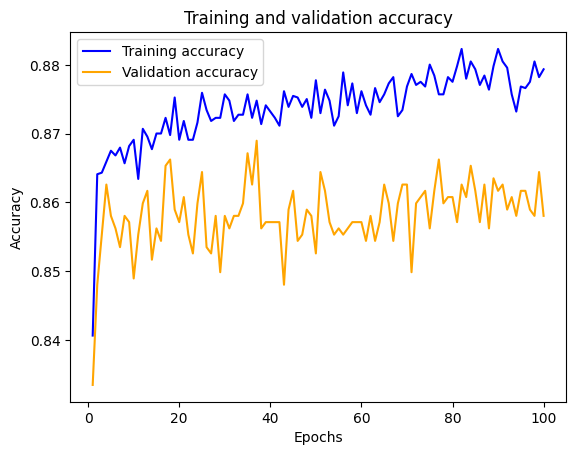

0.8823127746582031

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'blue', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


np.max(acc)

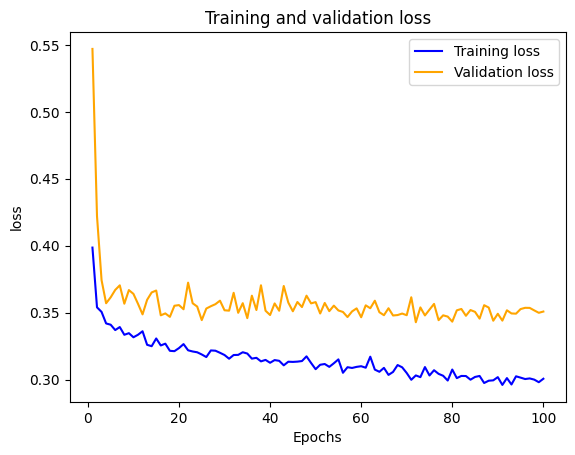

0.39859485626220703

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


np.max(loss)


In [31]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

43/43 [==============================] - 0s 2ms/step - loss: 0.3346 - accuracy: 0.8682
Test Loss: 0.3346
Test Accuracy: 0.8682


In [32]:

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

43/43 [==============================] - 0s 2ms/step


In [33]:
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1 Score:", f1)


Test Precision: 0.9054054054054054
Test Recall: 0.9187071498530852
Test F1 Score: 0.9120077783179387


In [43]:
fpr, tpr, threshold= roc_curve(y_test, y_pred)

roc_auc = auc(fpr, tpr)

print("AUC:", roc_auc)
roc_metrics = pd.DataFrame(fpr, columns=['fpr'])
roc_metrics['tpr'] = tpr

roc_metrics.to_csv('./batch_norm_metrics/batch_norm_roc.csv')


AUC: 0.9000701184222242


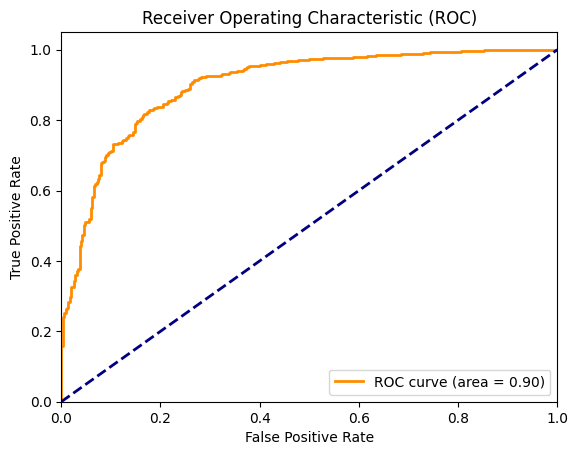

In [41]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [44]:
batch_norm_metrics = pd.DataFrame(history.history)

In [45]:
if not os.path.exists('./batch_norm_metrics'):
    os.makedirs('./batch_norm_metrics')


In [46]:

batch_norm_metrics.to_csv('./batch_norm_metrics/batch_norm_lda.csv', index=False)